In [6]:
words = open('names.txt', 'r').read().splitlines()

In [7]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [8]:
len(words)

32033

In [9]:
min(len(w) for w in words)

2

In [10]:
max(len(w) for w in words)

15

In [11]:
b = {}

for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs[:-1], chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [12]:
sorted(b.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [13]:
import torch

In [14]:
a = torch.zeros((3, 5))
a, a.dtype

(tensor([[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]),
 torch.float32)

In [15]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [16]:
chars = sorted(list(set(''.join(words))))

stoi = {s: i for i, s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [17]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs[:-1], chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

In [18]:
itos = {s:i for i, s in stoi.items()}

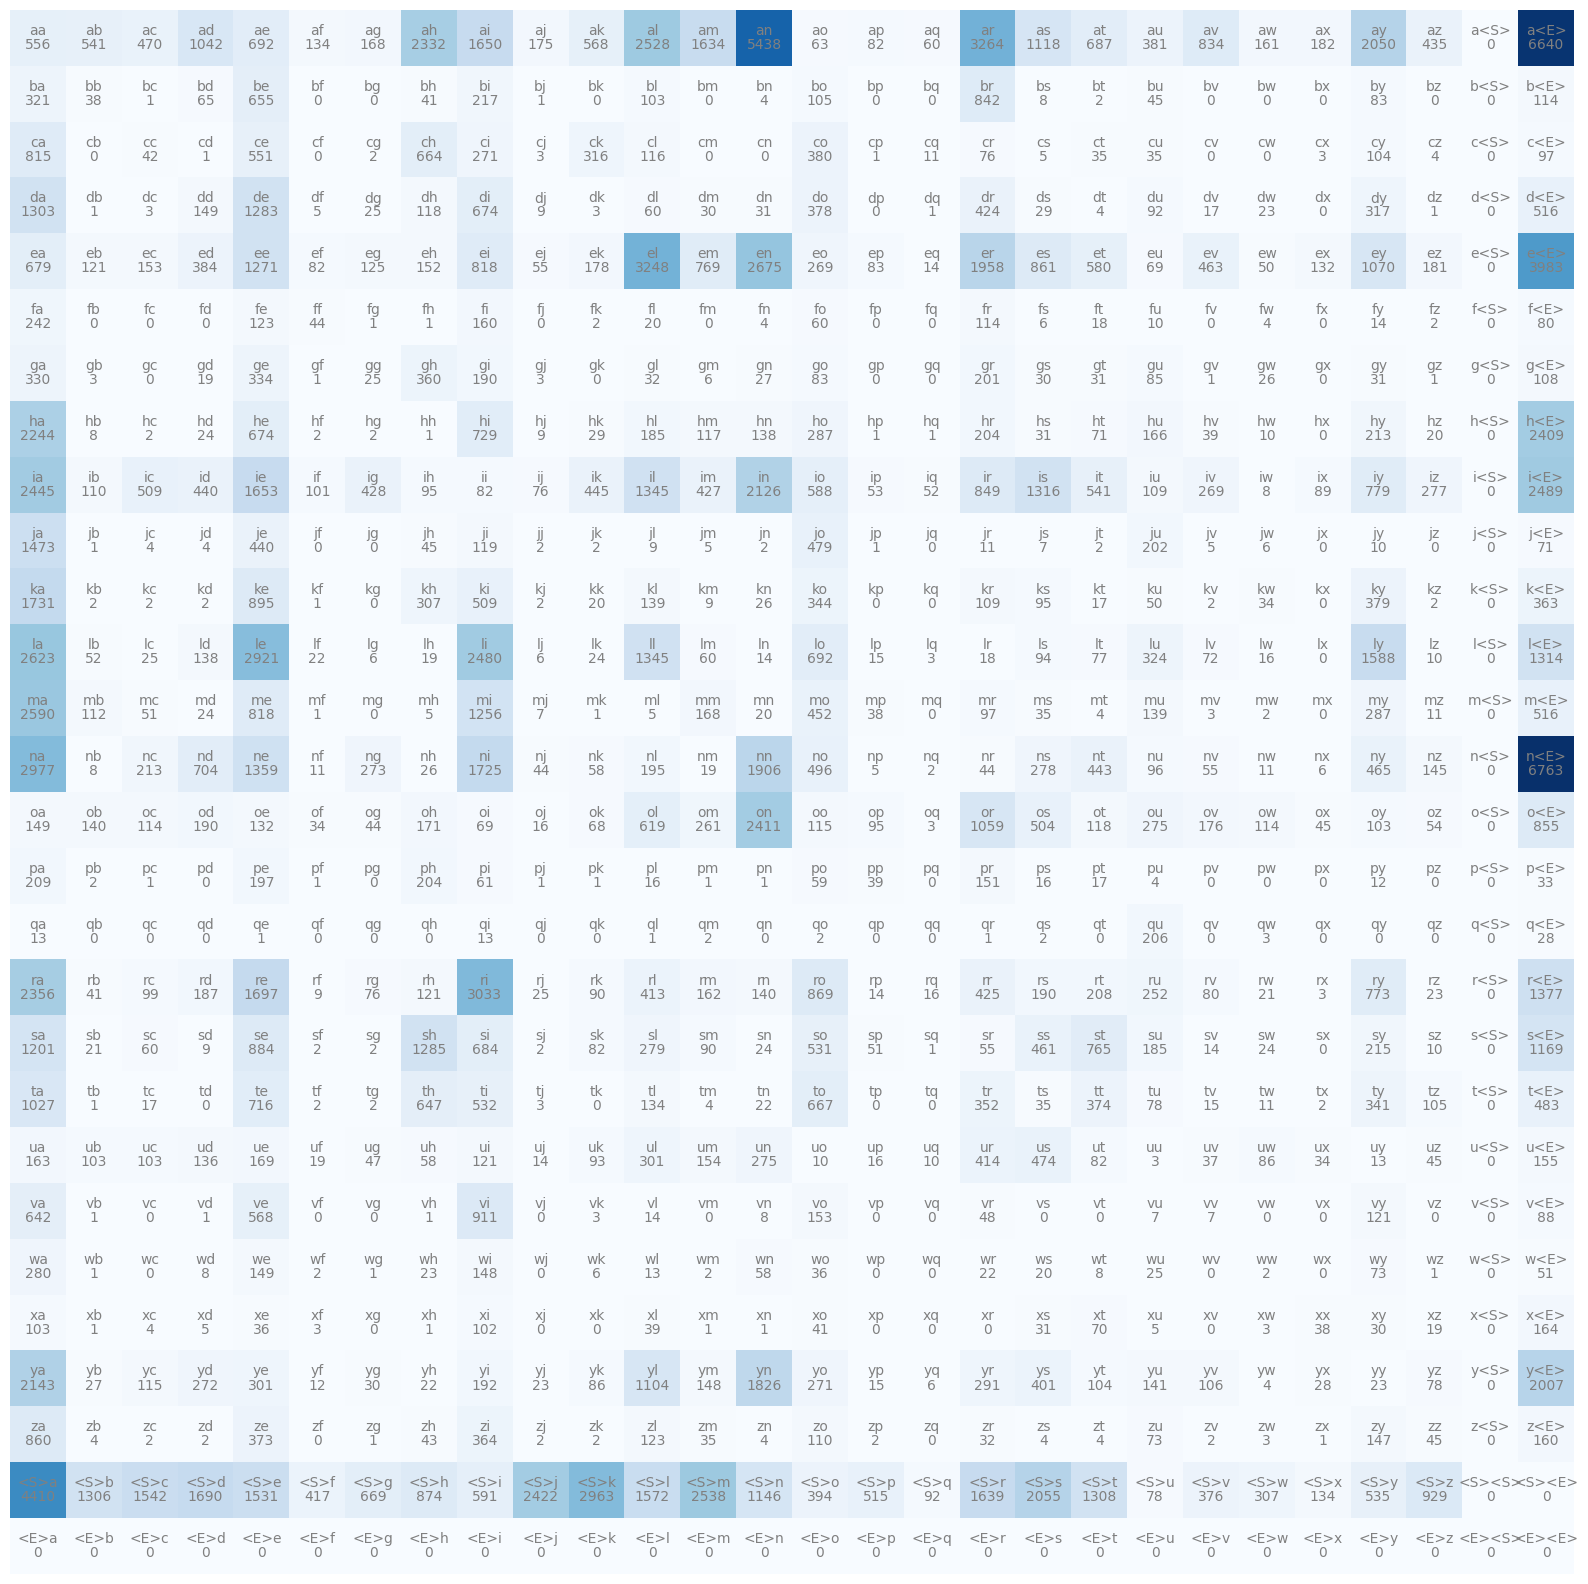

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='grey')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='grey')
plt.axis('off')
plt.tight_layout()
plt.show()

In [23]:
chars = sorted(list(set(''.join(words))))

stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {s:i for i, s in stoi.items()}

In [29]:
N = torch.zeros((27,27), dtype=torch.int)
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs[:-1], chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

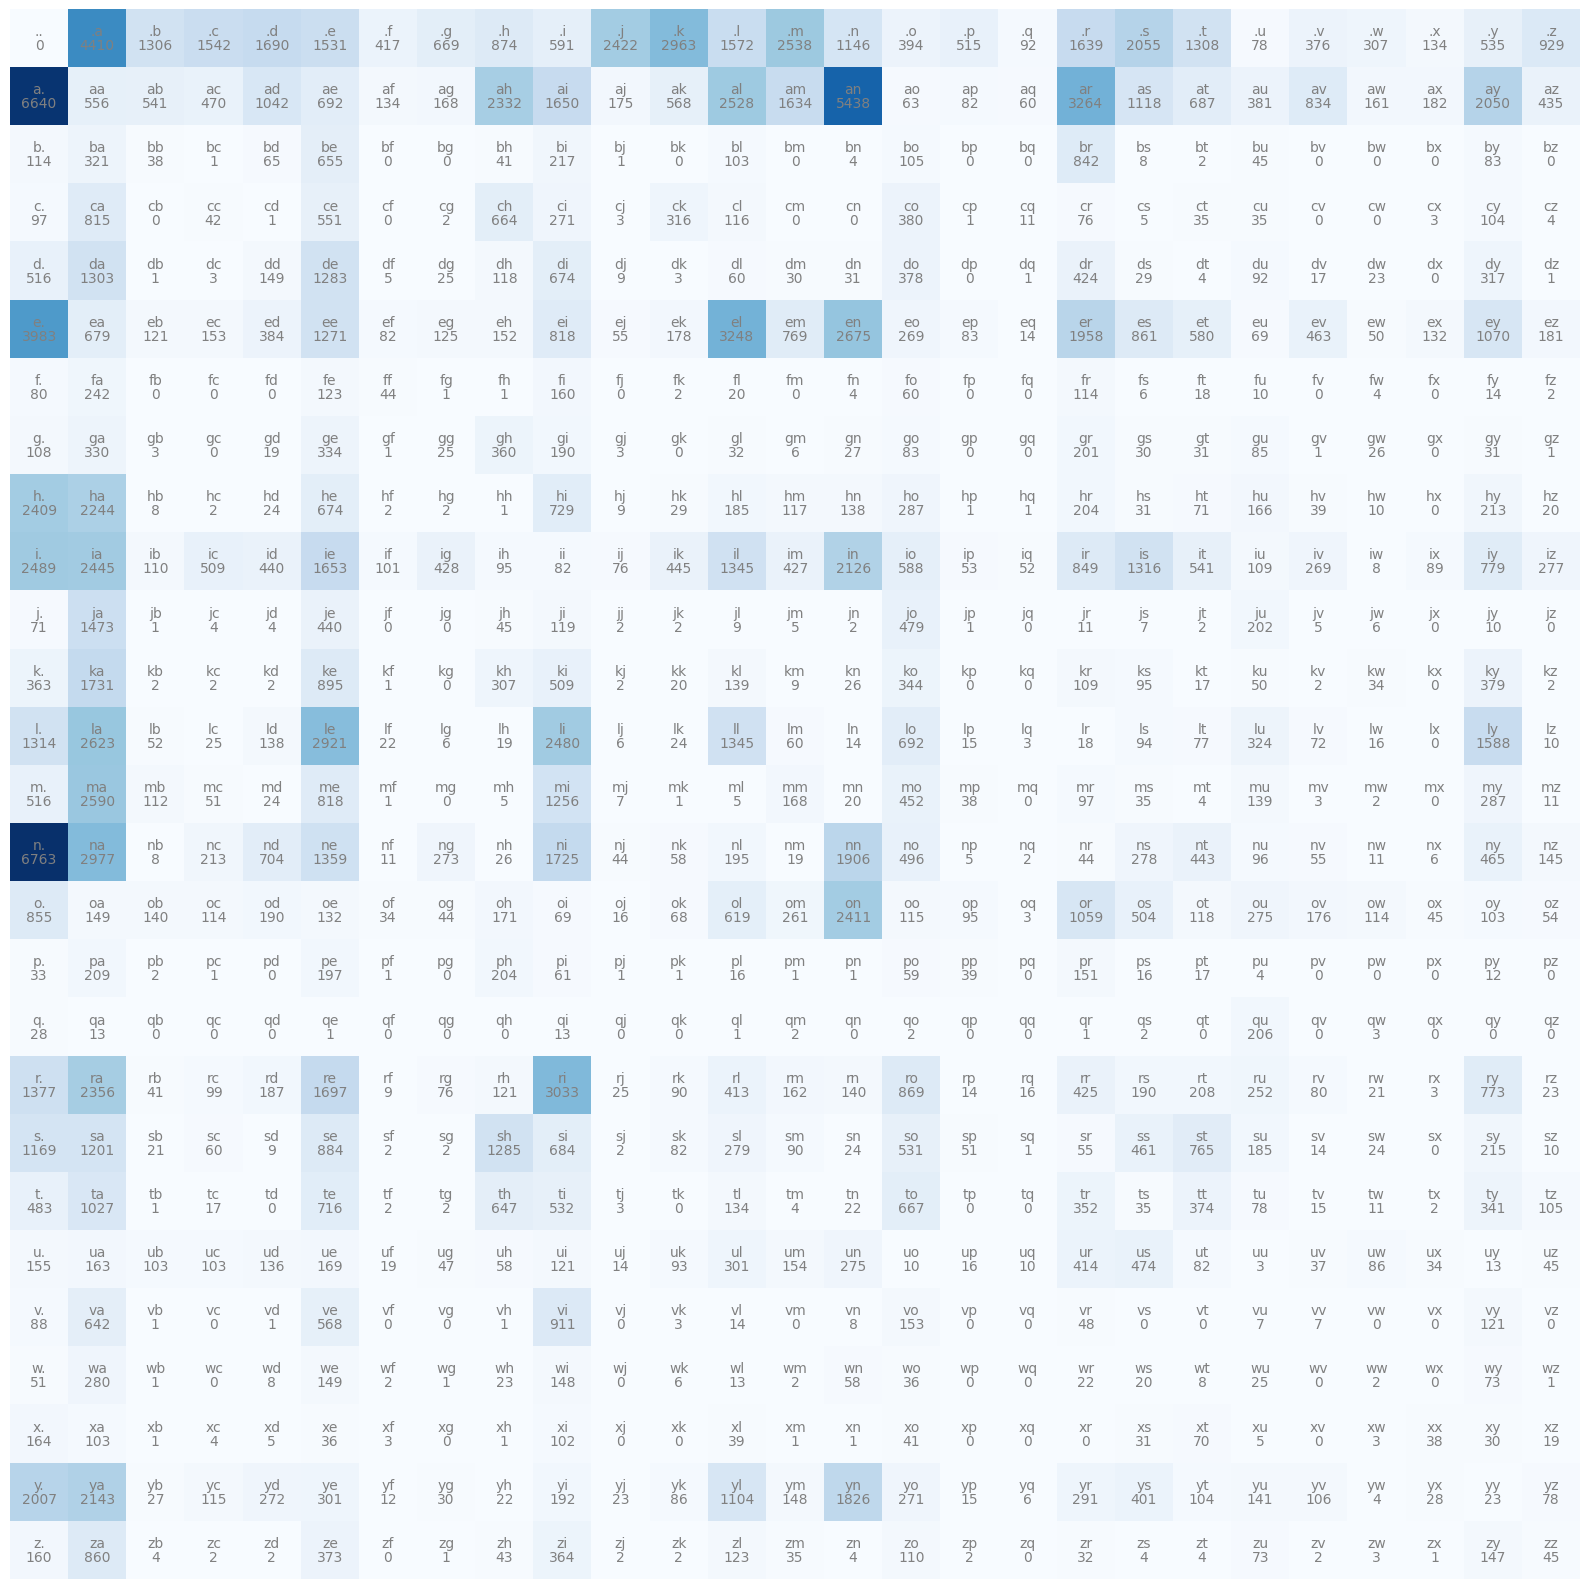

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(len(stoi.items())):
    for j in range(len(stoi.items())):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='grey')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='grey')
plt.axis('off')
plt.tight_layout()
plt.show()

In [80]:
p = N[0].float()
p = p / p.sum()

In [72]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [82]:
p = N[0].float()
p = p / p.sum()
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [90]:
P = N.float()
P = P / P.sum(axis=0)

In [91]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out = []
    ix = 0
    while True:
        #p = N[ix].float()
        #p = p/p.sum()
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))    

juwidedigwaquzopruffyobinn.
fovinttophows.
gwevisliniauwabileviackhbduinrwiqulysstyicaylaftezufftumestfodoumjuppptsuwahouzzi.
core.
ysezockhawavedinerimouffwynin.
wicasn.
mppimopsuxxxdgossmpttavicuqurphufothotorkyrslu.
igumubri.
mmevujemahuxxwyubevavickarr.
wdohufforta.
mppydabelyuquiqumuwoockazhemimayawathub.
sexxxtzzylitikyzzaloevevinushewkffrushemph.
ftenzyuwy.
joffodridrdwnonialiypprghaxtezrwayliquvywhqulvaviosthibdhaceldgttewixsstoboniupexxxippetewylowyccodacrcqurviynkwsowannjwesodomafffttorepiguqweshdabrviuchweahrtugttilybusthtouwequton.
codfrdwelipphkwtalveondwal.
fidmahv.
mmigama.
veghkongh.
jordiynivixi.
qukengwgtivyvegusth.
